# Project: Improving Relational Language Understanding in Intelligent Virtual Agents (IVAs)

## INTRODUCTION

Customer service interactions play a pivotal role in user experience. This project aims to enhance the understanding of relational strategies in customer service by analyzing the RSiCS dataset. Additionally, a rule-based chatbot will be integrated to facilitate enhanced user interaction.

## BUSINESS UNDERSTANDING

In today's digital landscape, customer service interactions are increasingly handled by Intelligent Virtual Agents (IVAs), automated systems designed to assist customers with their inquiries. However, many IVAs struggle to effectively understand and respond to the relational aspects of these interactions, such as greetings, backstory, and emotions. Developing a deeper understanding of relational language is crucial for IVAs to provide personalized and empathetic customer experiences, which are essential for fostering positive customer relationships and enhancing satisfaction. Despite the growing reliance on IVAs in customer service, there remains a lack of comprehensive datasets and methodologies for training and evaluating IVAs on relational language comprehension and response generation, posing a significant challenge in improving the quality of customer service in the digital age.

### PROBLEM STATEMENT

Existing Intelligent Virtual Agents (IVAs) often fail to interpret and respond appropriately to relational language cues in customer interactions, leading to suboptimal customer experiences and decreased satisfaction levels. This limitation impedes IVAs' ability to build rapport with customers, address their needs effectively, and cultivate positive relationships. Consequently, there is a pressing need to develop methodologies and tools that enable IVAs to accurately comprehend and respond to relational language cues, thereby improving the quality of customer service interactions and enhancing overall customer satisfaction.

### OBJECTIVE

The objective of this project is to bridge the gap in Intelligent Virtual Agents' (IVAs) ability to understand and respond to relational language cues in customer interactions. By leveraging a comprehensive dataset sourced from three live customer service IVAs operating in the domains of travel and telecommunications, annotated with relational language cues, the aim is to develop and evaluate methodologies for training and enhancing IVAs' relational language comprehension and response generation capabilities. Ultimately, the goal is to empower IVAs to provide more personalized, empathetic, and effective customer service experiences, thereby improving customer satisfaction and loyalty.

### SOURCE OF DATA

### RSiCS Dataset Overview

#### 1. Source of Data
The RSiCS dataset was collected from commercial customer service IVAs and the TripAdvisor airline forum ([source](https://nextit-public.s3-us-west-2.amazonaws.com/rsics.html)).

#### 2. Data Contents and Formatting:

1. **x_y_align.csv**
  - captures alignment and agreement metrics between Annotator A (x) and Annotator B in a group for specific requests.

2. **all_data_by_threshold.csv**:
   - Merges selections and determines user intentions.

3. **tagged_selections_by_sentence.csv**:
   - Identifies relational language in user requests.

4. **all_multi_intent.csv**:
   - Flags requests with multiple intentions for intent detection strategies.

#### 3. Feature Information (Columns):

**x_y_align.csv:**

- **Annotator A ID:** x
- **Annotator B ID:** Annotator that the alignment score with x is calculated against.
- **Group ID:** The group of 4 annotators that the compared users belong to.
- **Dataset ID:** Dataset y that the request originated from.
- **Request ID:** Unique ID of a request to allow joining between different files.
- **Text:** The original request text.
- **Annotator A Text:** The request text with selections from annotator A contained within [ and ].
- **Annotator B Text:** The request text with selections from annotator B contained within [ and ].
- **Length:** The character length (n) of the original request text in column 6.
- **Error:** The number of character positions (e) where the binary determination of A and B do not agree.
- **Alignment Score:** The alignment as calculated by align = (n - e) / n.
- **Agreement:** Whether or not A and B agree that any selection is necessary.


##### all_data_by_threshold.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **MultiIntent**: Flag for multiple user intentions.
- **Threshold**: Selection merging threshold.
- **MergedSelections**: Merged selections by threshold.
- **Unselected**: Unselected text.
- **Selected**: Selected text.
- **Removed**: Length of removed text.

##### tagged_selections_by_sentence.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **Threshold**: Selection merging threshold.
- **MergedSelections**: Merged selections by threshold.
- **Unselected**: Unselected text.
- **Selected**: Selected text.
- **Greeting**: Presence of greeting.
- **Backstory**: Presence of self-exposure language.
- **Justification**: Presence of justification language.
- **Rant**: Presence of ranting language.
- **Gratitude**: Presence of gratitude expressions.
- **Other**: Presence of additional information.
- **Express Emotion**: Presence of emotional language.

##### all_multi_intent.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **Text**: Original request text.
- **Annotator x**: Binary flag for annotator x's belief in multiple intents.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### Reading Data


In [2]:
def load_datasets():
    # Replace these file paths with the actual paths to your CSV files
    file_paths = [
        'x_y_align.csv',
        'all_data_by_threshold.csv',
        'tagged_selections_by_sentence.csv',
        'all_multi_intent.csv'
    ]

    # Create a dictionary to store the loaded datasets
    datasets = {file_path.split('.')[0]: pd.read_csv(file_path) for file_path in file_paths}

    # Display the loaded datasets
    for name, df in datasets.items():
        print(f"\n{name} DataFrame:")
        print(df.head())

    return datasets

# Call the function to load datasets
loaded_datasets = load_datasets()



x_y_align DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I will be transiting Dub

# Data Understanding


### Exploration

In [3]:
def load_datasets():
    # Replace these file paths with the actual paths to your CSV files
    file_paths = [
        'x_y_align.csv',
        'all_data_by_threshold.csv',
        'tagged_selections_by_sentence.csv',
        'all_multi_intent.csv'
    ]

    # Create a dictionary to store the loaded datasets
    datasets = {file_path.split('.')[0]: pd.read_csv(file_path) for file_path in file_paths}

    return datasets

def explore_datasets(datasets):
    for name, df in datasets.items():
        print(f"\n{name} DataFrame:")
        # Print the first 5 rows
        print("Head of the DataFrame:")
        print(df.head())

        # Print the shape of the DataFrame
        print("\nShape of the DataFrame:", df.shape)

        # Print summary statistics
        print("\nSummary statistics of the DataFrame:")
        print(df.describe())

        # Print information about the DataFrame
        print("\nInformation about the DataFrame:")
        print(df.info())

# Load datasets
loaded_datasets = load_datasets()

# Explore datasets
explore_datasets(loaded_datasets)




x_y_align DataFrame:
Head of the DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I

           Dataset    Partition    SentenceID  Threshold     Greeting  \
count  6759.000000  6759.000000   6759.000000     6759.0  6759.000000   
mean      2.633082     1.501849   6352.966415        2.0     0.118657   
std       1.074610     0.500034   2626.089435        0.0     0.323408   
min       1.000000     1.000000   1464.000000        2.0     0.000000   
25%       2.000000     1.000000   4171.500000        2.0     0.000000   
50%       3.000000     2.000000   6545.000000        2.0     0.000000   
75%       4.000000     2.000000   8700.500000        2.0     0.000000   
max       4.000000     2.000000  10521.000000        2.0     1.000000   

         Backstory  Justification         Rant    Gratitude        Other  \
count  6759.000000    6759.000000  6759.000000  6759.000000  6759.000000   
mean      0.308626       0.010652     0.043350     0.076639     0.213641   
std       0.461960       0.102667     0.203658     0.266037     0.409907   
min       0.000000       0.000000     

1. x_y_align: 81,268 entries, 12 columns; offers alignment metrics (0 to 1) between Annotators A (ID: x) and B, with Agreement indication.

1. All Data: Contains 32,000 entries with text data and categorical variables, exhibiting moderate variation in 'Removed' scores.

2. Tagged Selections: Encompasses 6,759 entries with text data and binary variables, showing 11.87% of entries with greetings.

3. All Multi-Intent: Comprises 1,241 entries with text data and annotations by multiple annotators, highlighting approximately 24.01% positive annotations by Annotator 1.

# Data Cleaning And Preprocessing

In [41]:
def check_data_quality(dataset, dataset_name):
    # Check for missing values
    missing_values = dataset.isnull().sum()

    # Check for duplicates
    duplicate_rows = dataset.duplicated().sum()

    # Check for outliers (considering only numerical columns)
    numerical_columns = dataset.select_dtypes(include=[np.number]).columns
    outliers = dataset[numerical_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std()).sum()

    # Check for data consistency
    consistency_checks = []

    # Additional consistency checks based on dataset columns
    binary_columns = ['MultiIntent', 'Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion']
    for col in binary_columns:
        if col in dataset.columns:
            unique_values = dataset[col].unique()
            if len(unique_values) != 2 or set(unique_values) - {0, 1}:
                consistency_checks.append(f"{col} should be binary (0 or 1): {unique_values}")

    # Results
    print(f"Checking data quality for {dataset_name} dataset:")
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])

    print("\nDuplicate Rows:")
    print(duplicate_rows)

    print("\nOutliers:")
    print(outliers[outliers > 0])

    print("\nData Consistency Checks:")
    for check in consistency_checks:
        print(check)

# Load datasets
x_y_align_data = pd.read_csv('x_y_align.csv')
all_data_df = pd.read_csv('all_data_by_threshold.csv')
tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
all_multi_intent_df = pd.read_csv('all_multi_intent.csv')

# Calling the function
check_data_quality(x_y_align_data, "x_y_align")
check_data_quality(all_data_df, "All Data")
check_data_quality(tagged_selections_df, "Tagged Selections")
check_data_quality(all_multi_intent_df, "All Multi-Intent")


Checking data quality for x_y_align dataset:

Missing Values:
Annotator A ID       32
Annotator B ID       32
Parition ID         160
Corpora ID          160
Sentence ID         160
Text                160
Annotator A Text    160
Annotator B Text    160
Length              160
Error               160
Alignment Score     160
Agreement           160
dtype: int64

Duplicate Rows:
55

Outliers:
Annotator B ID       32
Length             1608
Error              1178
Alignment Score    1560
dtype: int64

Data Consistency Checks:
Checking data quality for All Data dataset:

Missing Values:
Unselected      798
Selected      17087
dtype: int64

Duplicate Rows:
0

Outliers:
Series([], dtype: int64)

Data Consistency Checks:
Checking data quality for Tagged Selections dataset:

Missing Values:
Unselected      34
Selected      2969
dtype: int64

Duplicate Rows:
0

Outliers:
Justification       72
Rant               293
Gratitude          518
Express Emotion    120
dtype: int64

Data Consistency Ch

1. In the All Data dataset, 798 missing values were found in 'Unselected' and 17087 in 'Selected', with no duplicate rows or outliers detected, while 'MultiIntent' was confirmed to be binary (0 or 1).

2. The Tagged Selections dataset revealed 34 missing values in 'Unselected' and 2969 in 'Selected', with outliers detected in 'Justification', 'Rant', 'Gratitude', and 'Express Emotion', while ensuring data consistency of binary attributes such as 'Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other', and 'Express Emotion'.

3. The All Multi-Intent dataset showed no missing values or duplicate rows, with outliers detected in 'Annotator 3', and notable anomalies found in the annotations made by 'Annotator 3'.

In [42]:
import pandas as pd

def load_x_y_align_dataset(file_path):
    """
    Load the x_y_align dataset from the specified file path.
    
    Parameters:
        file_path (str): The path to the CSV file containing the dataset.
        
    Returns:
        pandas.DataFrame: The loaded dataset.
    """
    try:
        dataset = pd.read_csv(file_path)
        return dataset
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None

# Example usage:
file_path = "x_y_align.csv"  # Update this with the actual file path
x_y_align_df = load_x_y_align_dataset(file_path)

# Check if the dataset loaded successfully
if x_y_align_df is not None:
    print("Dataset loaded successfully.")
    # Now you can use the loaded dataset for further processing
    # For example, you can preprocess it using the preprocess_x_y_align function mentioned earlier.
else:
    print("Failed to load the dataset.")




Dataset loaded successfully.


In [52]:
# Check for missing values
missing_values_exist = x_y_align_df.isnull().values.any()
if missing_values_exist:
    print("Missing values exist in the dataset.")
else:
    print("No missing values found in the dataset.")

# Check for duplicates
duplicates_exist = x_y_align_df.duplicated().any()
if duplicates_exist:
    print("Duplicates exist in the dataset.")
else:
    print("No duplicates found in the dataset.")

# Check for outliers (you may need to define a specific method to identify outliers based on your data and domain knowledge)
# For example, you can use z-score method to identify outliers
from scipy.stats import zscore

# Select numeric columns only for outlier detection
numeric_columns = x_y_align_df.select_dtypes(include=['number'])

# Calculate z-scores for each numeric column
z_scores = zscore(numeric_columns)

# Set threshold for outliers
outlier_threshold = 3  # Adjust this threshold based on your data and requirements

# Identify outliers
outliers = (z_scores > outlier_threshold).any(axis=1)

if any(outliers):
    print("Outliers exist in the dataset.")
else:
    print("No outliers found in the dataset.")



No missing values found in the dataset.
No duplicates found in the dataset.
Outliers exist in the dataset.


In [53]:
# Print the names of all columns
print("Column names:")
for column_name in x_y_align_df.columns:
    print(column_name)


Column names:
Annotator A ID
Annotator B ID
Parition ID
Corpora ID
Sentence ID
Text
Annotator A Text
Annotator B Text
Length
Error
Alignment Score
Agreement


In [55]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')
        
        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df
    
    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()


In [56]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')
        
        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df
    
    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

def print_data_info(df, name):
    print(f"\nInfo for {name} dataset:")
    print("Number of missing values:")
    print(df.isnull().sum())
    
    print("\nNumber of outliers:")
    # You can add your outlier detection logic here
    
    print("\nNumber of duplicates:")
    print(df.duplicated().sum())

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()

# Print information for each dataset
print_data_info(all_data, 'all_data_by_threshold')
print_data_info(tagged_selections, 'tagged_selections_by_sentence')
print_data_info(all_multi_intent, 'all_multi_intent')




Info for all_data_by_threshold dataset:
Number of missing values:
Dataset ID              0
Group ID                0
Request ID              0
MultiIntent             0
Threshold               0
MergedSelections        0
Unselected            798
Selected            17087
Removed                 0
dtype: int64

Number of outliers:

Number of duplicates:
0

Info for tagged_selections_by_sentence dataset:
Number of missing values:
Dataset                0
Partition              0
SentenceID             0
Threshold              0
MergedSelections       0
Unselected            34
Selected            2969
Greeting               0
Backstory              0
Justification          0
Rant                   0
Gratitude              0
Other                  0
Express Emotion        0
dtype: int64

Number of outliers:

Number of duplicates:
0

Info for all_multi_intent dataset:
Number of missing values:
Dataset ID     0
Group ID       0
Request ID     0
Text           0
Annotator 1    0
Annotator

In [48]:
import pandas as pd

# Load datasets
all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')

# Function to drop columns with missing values and print the updated columns
def drop_columns(df, columns_to_drop, dataset_name):
    df.drop(columns=columns_to_drop, inplace=True)  # Corrected 'axis' to 'columns'
    print(f"Columns after dropping {', '.join(columns_to_drop)} in {dataset_name} dataset:")
    print(df.columns)

# Drop columns for all_data_by_threshold dataset
drop_columns(all_data_by_threshold_df, ['Unselected', 'Selected'], 'all_data_by_threshold')

# Drop columns for tagged_selections_by_sentence dataset
drop_columns(tagged_selections_df, ['Unselected', 'Selected'], 'tagged_selections_by_sentence')



Columns after dropping Unselected, Selected in all_data_by_threshold dataset:
Index(['Dataset ID', 'Group ID', 'Request ID', 'MultiIntent', 'Threshold',
       'MergedSelections', 'Removed'],
      dtype='object')
Columns after dropping Unselected, Selected in tagged_selections_by_sentence dataset:
Index(['Dataset', 'Partition', 'SentenceID', 'Threshold', 'MergedSelections',
       'Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other',
       'Express Emotion'],
      dtype='object')


In [49]:
# Function to print unique values for each column in a DataFrame
def print_unique_values(df, name):
    print(f"\nUnique values for columns in {name} dataset:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"{column}: {unique_values}")

# Call the function for each dataset
print_unique_values(all_data_by_threshold_df, 'all_data_by_threshold')
print_unique_values(tagged_selections_df, 'tagged_selections_by_sentence')
print_unique_values(all_multi_intent_df, 'all_multi_intent')






Unique values for columns in all_data_by_threshold dataset:
Dataset ID: [1 2 3 4]
Group ID: [1 2]
Request ID: [1483 2439 2367 ... 9596 9570 9561]
MultiIntent: [0 1]
Threshold: [1 2 3 4]
MergedSelections: ['[Today Ellemay wrote: “I however, like Qantas and apart from a few "bad" times mostly I find them to offer an excellent service..especially after you try some other airlines in the world.......I like my flying kangaroo ! I could write some wicked experiences I have had on other airlines but it would be zapped ......from TA quickly.....” A couple of days ago on this thread tripadvisor.com/ShowTopic-g1-i10702-k908667-… petite 001 wrote a long complaint about Mexicana. While I didn’t think the vehemence of her complaint was actually justified I still don’t understand why TA saw fit to remove her post. At other times I have seen really spurious and damaging complaints about small accommodation houses and restaurants left uncensored. ]I would really like to know the criteria which TA use

In [50]:
# Function to print column names and datatypes for a DataFrame
def print_column_info(df, name):
    print(f"\nColumn names and datatypes in {name} dataset:")
    for column in df.columns:
        datatype = df[column].dtype
        print(f"{column}: {datatype}")

# Call the function for each dataset
print_column_info(all_data_by_threshold_df, 'all_data_by_threshold')
print_column_info(tagged_selections_df, 'tagged_selections_by_sentence')
print_column_info(all_multi_intent_df, 'all_multi_intent')






Column names and datatypes in all_data_by_threshold dataset:
Dataset ID: int64
Group ID: int64
Request ID: int64
MultiIntent: int64
Threshold: int64
MergedSelections: object
Removed: float64

Column names and datatypes in tagged_selections_by_sentence dataset:
Dataset: int64
Partition: int64
SentenceID: int64
Threshold: int64
MergedSelections: object
Greeting: int64
Backstory: int64
Justification: int64
Rant: int64
Gratitude: int64
Other: int64
Express Emotion: int64

Column names and datatypes in all_multi_intent dataset:
Dataset ID: int64
Group ID: int64
Request ID: int64
Text: object
Annotator 1: int64
Annotator 2: int64
Annotator 3: int64
Annotator 4: int64
Annotator 5: int64
Annotator 6: int64
Annotator 7: int64
Annotator 8: int64


#### Consolidation

###### Merge `all_data_df` with `tagged_selections_df`


In [63]:
import pandas as pd

def merge_datasets(dataset1, dataset2):
    # Merge datasets on the common column 'Text'
    merged_dataset = pd.merge(dataset1, dataset2, on='Text', how='inner')
    return merged_dataset

# Load datasets
x_y_align_data = pd.read_csv('x_y_align.csv')
all_multi_intent_df = pd.read_csv('all_multi_intent.csv')

# Merge datasets
merged_dataset = merge_datasets(x_y_align_data, all_multi_intent_df)

# Display the merged dataset
print(merged_dataset.head())








  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       7306.0   
1              1             3.0          2.0         1.0       7306.0   
2              1             5.0          2.0         1.0       7306.0   
3              3             7.0          2.0         1.0       7306.0   
4              3             1.0          2.0         1.0       7306.0   

                                                Text  \
0  I am not very tech savvy and don't know if I s...   
1  I am not very tech savvy and don't know if I s...   
2  I am not very tech savvy and don't know if I s...   
3  I am not very tech savvy and don't know if I s...   
4  I am not very tech savvy and don't know if I s...   

                                    Annotator A Text  \
0  [I am not very tech savvy and don't know if I ...   
1  [I am not very tech savvy and don't know if I ...   
2  [I am not very tech savvy and don't know if I .

In [65]:
import pandas as pd

def merge_datasets(dataset1, dataset2, common_columns):
    # Merge datasets on the common columns
    merged_dataset = pd.merge(dataset1, dataset2, on=common_columns, how='inner')
    return merged_dataset

# Load datasets
x_y_align_data = pd.read_csv('x_y_align.csv')
all_multi_intent_df = pd.read_csv('all_multi_intent.csv')
all_data_df = pd.read_csv('all_data_by_threshold.csv')

# Merge x_y_align_data and all_multi_intent_df
merged_dataset = merge_datasets(x_y_align_data, all_multi_intent_df, 'Text')

# Merge merged_dataset with all_data_df
final_merged_dataset = merge_datasets(merged_dataset, all_data_df, ['Group ID', 'Request ID'])

# Display the merged dataset
print(final_merged_dataset.head())


  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       7306.0   
1              1             7.0          2.0         1.0       7306.0   
2              1             7.0          2.0         1.0       7306.0   
3              1             7.0          2.0         1.0       7306.0   
4              1             3.0          2.0         1.0       7306.0   

                                                Text  \
0  I am not very tech savvy and don't know if I s...   
1  I am not very tech savvy and don't know if I s...   
2  I am not very tech savvy and don't know if I s...   
3  I am not very tech savvy and don't know if I s...   
4  I am not very tech savvy and don't know if I s...   

                                    Annotator A Text  \
0  [I am not very tech savvy and don't know if I ...   
1  [I am not very tech savvy and don't know if I ...   
2  [I am not very tech savvy and don't know if I .

In [68]:
import pandas as pd

def merge_datasets_by_threshold(dataset1, dataset2):
    """
    Merge two datasets based on the common column 'Threshold'.
    
    Parameters:
        dataset1 (DataFrame): The first dataset.
        dataset2 (DataFrame): The second dataset.
    
    Returns:
        DataFrame: The merged dataset.
    """
    # Merge datasets on the common column 'Threshold'
    merged_dataset = pd.merge(dataset1, dataset2, on='Threshold', how='inner')
    return merged_dataset

# Load Tagged Selections dataset
tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')

# Merge datasets using 'Threshold'
merged_by_threshold = merge_datasets_by_threshold(final_merged_dataset, tagged_selections_df)

# Display the merged dataset
print(merged_by_threshold.head())




  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       7306.0   
1              1             7.0          2.0         1.0       7306.0   
2              1             7.0          2.0         1.0       7306.0   
3              1             7.0          2.0         1.0       7306.0   
4              1             7.0          2.0         1.0       7306.0   

                                                Text  \
0  I am not very tech savvy and don't know if I s...   
1  I am not very tech savvy and don't know if I s...   
2  I am not very tech savvy and don't know if I s...   
3  I am not very tech savvy and don't know if I s...   
4  I am not very tech savvy and don't know if I s...   

                                    Annotator A Text  \
0  [I am not very tech savvy and don't know if I ...   
1  [I am not very tech savvy and don't know if I ...   
2  [I am not very tech savvy and don't know if I .

Filling NaN values with 0 in numerical columns and with empty strings in categorical columns, given that missing values arose solely from differences in dataset lengths during merging, ensures data consistency and facilitates downstream analysis without introducing biases.

In [74]:
import pandas as pd

def check_data_quality(df):
    """
    Check data quality: missing values, duplicates, and outliers in binary columns.
    
    Parameters:
        df (DataFrame): The input DataFrame.
    
    Returns:
        dict: A dictionary containing information about missing values, duplicates, and outliers.
    """
    # Dictionary to store results
    quality_report = {}

    # Check for missing values
    missing_values = df.isnull().sum().sum()
    quality_report['missing_values'] = missing_values

    # Check for duplicates
    duplicates = df.duplicated().sum()
    quality_report['duplicates'] = duplicates

    # Check for outliers in binary columns
    binary_columns = df.select_dtypes(include=['bool']).columns
    outliers = {}
    for col in binary_columns:
        outliers[col] = df[col].value_counts()

    quality_report['outliers'] = outliers

    return quality_report

quality_report = check_data_quality(merged_by_threshold)
print(quality_report)



{'missing_values': 342396, 'duplicates': 0, 'outliers': {}}


In [78]:
import pandas as pd

def check_data_quality(df):
    """
    Check data quality: missing values, duplicates, and outliers in binary columns.
    
    Parameters:
        df (DataFrame): The input DataFrame.
    
    Returns:
        dict: A dictionary containing information about missing values, duplicates, and outliers.
    """
    # Dictionary to store results
    quality_report = {}

    # Check for missing values
    missing_values = df.isnull().sum()
    quality_report['missing_values'] = missing_values[missing_values > 0]

    # Check for duplicates
    duplicates = df.duplicated().sum()
    quality_report['duplicates'] = duplicates

    # Check for outliers in binary columns
    binary_columns = df.select_dtypes(include=['bool']).columns
    outliers = {}
    for col in binary_columns:
        outliers[col] = df[col].value_counts()

    quality_report['outliers'] = outliers

    return quality_report


quality_report = check_data_quality(merged_by_threshold)
print(quality_report)


{'missing_values': Selected_x      162216
Unselected_y      2040
Selected_y      178140
dtype: int64, 'duplicates': 0, 'outliers': {}}


In [86]:
import pandas as pd

def create_binary_identifiers(df, columns_with_missing):
    """
    Create binary identifier columns based on missing values for specified columns.
    
    Parameters:
        df (DataFrame): The input DataFrame.
        columns_with_missing (list): A list of column names with missing values.
    
    Returns:
        DataFrame: DataFrame with binary identifier columns.
    """
    # Create binary identifier columns for specified columns
    for col in columns_with_missing:
        df[f'{col}_binary_identifier'] = df[col].isnull().astype(int)
    
    return df

# Columns with missing values
columns_with_missing = ['Selected_x', 'Unselected_y', 'Selected_y']

# Example usage:
df_with_binary_identifiers = create_binary_identifiers(merged_by_threshold, columns_with_missing)
print(df_with_binary_identifiers.head())



  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       7306.0   
1              1             7.0          2.0         1.0       7306.0   
2              1             7.0          2.0         1.0       7306.0   
3              1             7.0          2.0         1.0       7306.0   
4              1             7.0          2.0         1.0       7306.0   

                                                Text  \
0  I am not very tech savvy and don't know if I s...   
1  I am not very tech savvy and don't know if I s...   
2  I am not very tech savvy and don't know if I s...   
3  I am not very tech savvy and don't know if I s...   
4  I am not very tech savvy and don't know if I s...   

                                    Annotator A Text  \
0  [I am not very tech savvy and don't know if I ...   
1  [I am not very tech savvy and don't know if I ...   
2  [I am not very tech savvy and don't know if I .

In [93]:
import pandas as pd

def print_column_names(df):
    """
    Print the number of columns by name.
    
    Parameters:
        df (DataFrame): The input DataFrame.
    """
    for i, col_name in enumerate(df.columns):
        print(f"Column {i}: {col_name}")


print_column_names(merged_by_threshold)


Column 0: Annotator A ID
Column 1: Annotator B ID
Column 2: Parition ID
Column 3: Corpora ID
Column 4: Sentence ID
Column 5: Text
Column 6: Annotator A Text
Column 7: Annotator B Text
Column 8: Length
Column 9: Error
Column 10: Alignment Score
Column 11: Agreement
Column 12: Dataset ID_x
Column 13: Group ID
Column 14: Request ID
Column 15: Annotator 1
Column 16: Annotator 2
Column 17: Annotator 3
Column 18: Annotator 4
Column 19: Annotator 5
Column 20: Annotator 6
Column 21: Annotator 7
Column 22: Annotator 8
Column 23: Dataset ID_y
Column 24: MultiIntent
Column 25: Threshold
Column 26: MergedSelections_x
Column 27: Unselected_x
Column 28: Selected_x
Column 29: Removed
Column 30: Dataset
Column 31: Partition
Column 32: SentenceID
Column 33: MergedSelections_y
Column 34: Unselected_y
Column 35: Selected_y
Column 36: Greeting
Column 37: Backstory
Column 38: Justification
Column 39: Rant
Column 40: Gratitude
Column 41: Other
Column 42: Express Emotion
Column 43: binary_identifier
Column 4

# Feature Selection

**Key Columns Overview:**

In the context of the IVA, several key columns play crucial roles in understanding, organizing, and processing user requests. These columns encompass identification, user input, annotated selections, alignment information, agreement indicators, language class annotations, missing value identifiers, and alignment/quality metrics.

**Identification and Context:**
- `Dataset ID_y`: Helps in understanding the source or domain of the request.
- `Request ID`: Unique identifier for individual requests, aiding in organization and tracking.

**User Input:**
- `Text`: Original user requests serve as input for IVA understanding.

**Annotated Selections:**
- `MergedSelections_y`: Annotated selections by annotators, marking potentially unnecessary parts in user requests.
- `Selected_y`: Text identified as relevant or necessary by annotators.

**Alignment Information:**
- `Alignment Score`: Indicates the alignment between annotators, providing insights into agreement or disagreement.

**Agreement Indicator:**
- `Agreement`: Binary indicator of whether annotators agree on the necessity of any selection.

**Language Class Annotations:**
- `Greeting`, `Backstory`, `Justification`, `Rant`, `Gratitude`, `Other`, `Express Emotion`: Provide information about the nature of language in the highlighted sections, helping in understanding user sentiment and context.

**Selected_y_binary_identifier:**
- `Missing_Selected_y`: Binary identifier for missing values in the 'Selected_y' column. Essential for handling missing data during training and inference.

**Alignment and Quality Metrics:**
- `Length`: Character length of the original request, useful for context and analysis.
- `Error`: Number of character positions where annotators disagree, highlighting potential areas for improvement in training data quality.
- `Removed`: Amount of text removed from the original request by merged selections, aiding in understanding the impact of selections.


In [94]:
import pandas as pd

def print_column_names(df, selected_columns):
    """
    Print the names of selected columns.
    
    Parameters:
        df (DataFrame): The input DataFrame.
        selected_columns (list): A list of column names to print.
    """
    for i, col_name in enumerate(selected_columns):
        print(f"Column {i}: {col_name}")

# Define the list of selected column names
selected_columns = [
    'Dataset ID_y', 'Request ID', 'Text', 'MergedSelections_y', 'Selected_y',
    'Alignment Score', 'Agreement', 'Greeting', 'Backstory', 'Justification',
    'Rant', 'Gratitude', 'Other', 'Express Emotion', 'Selected_y_binary_identifier',
    'Length', 'Error', 'Removed'
]

# Example usage:
df = pd.DataFrame()  # Replace this with your actual DataFrame
print_column_names(df, selected_columns)



Column 0: Dataset ID_y
Column 1: Request ID
Column 2: Text
Column 3: MergedSelections_y
Column 4: Selected_y
Column 5: Alignment Score
Column 6: Agreement
Column 7: Greeting
Column 8: Backstory
Column 9: Justification
Column 10: Rant
Column 11: Gratitude
Column 12: Other
Column 13: Express Emotion
Column 14: Selected_y_binary_identifier
Column 15: Length
Column 16: Error
Column 17: Removed


# Exploratory Data Analysis

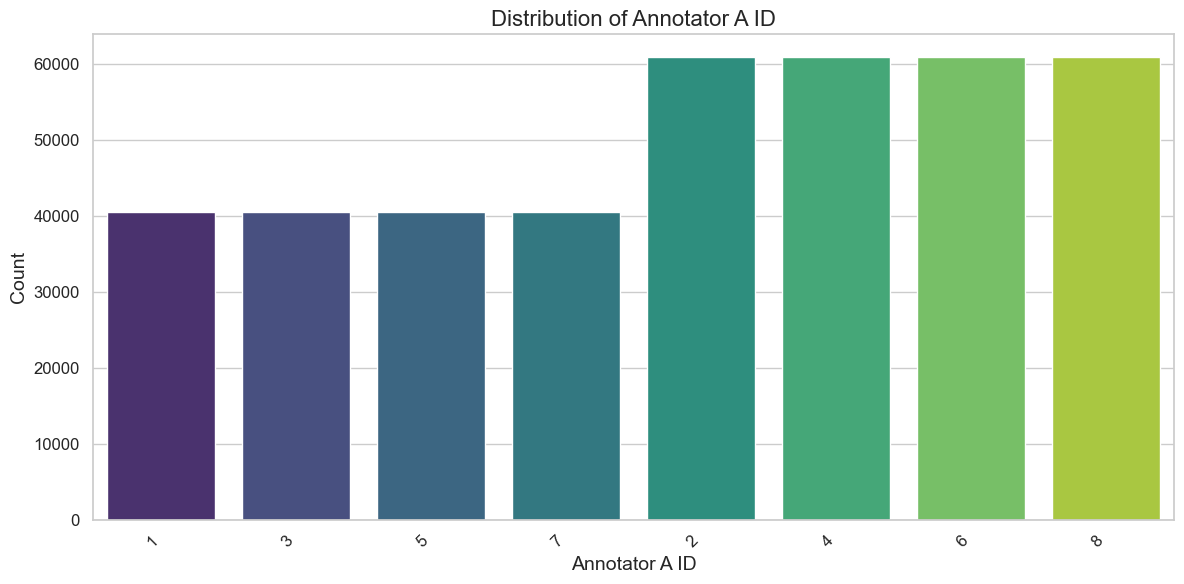

C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


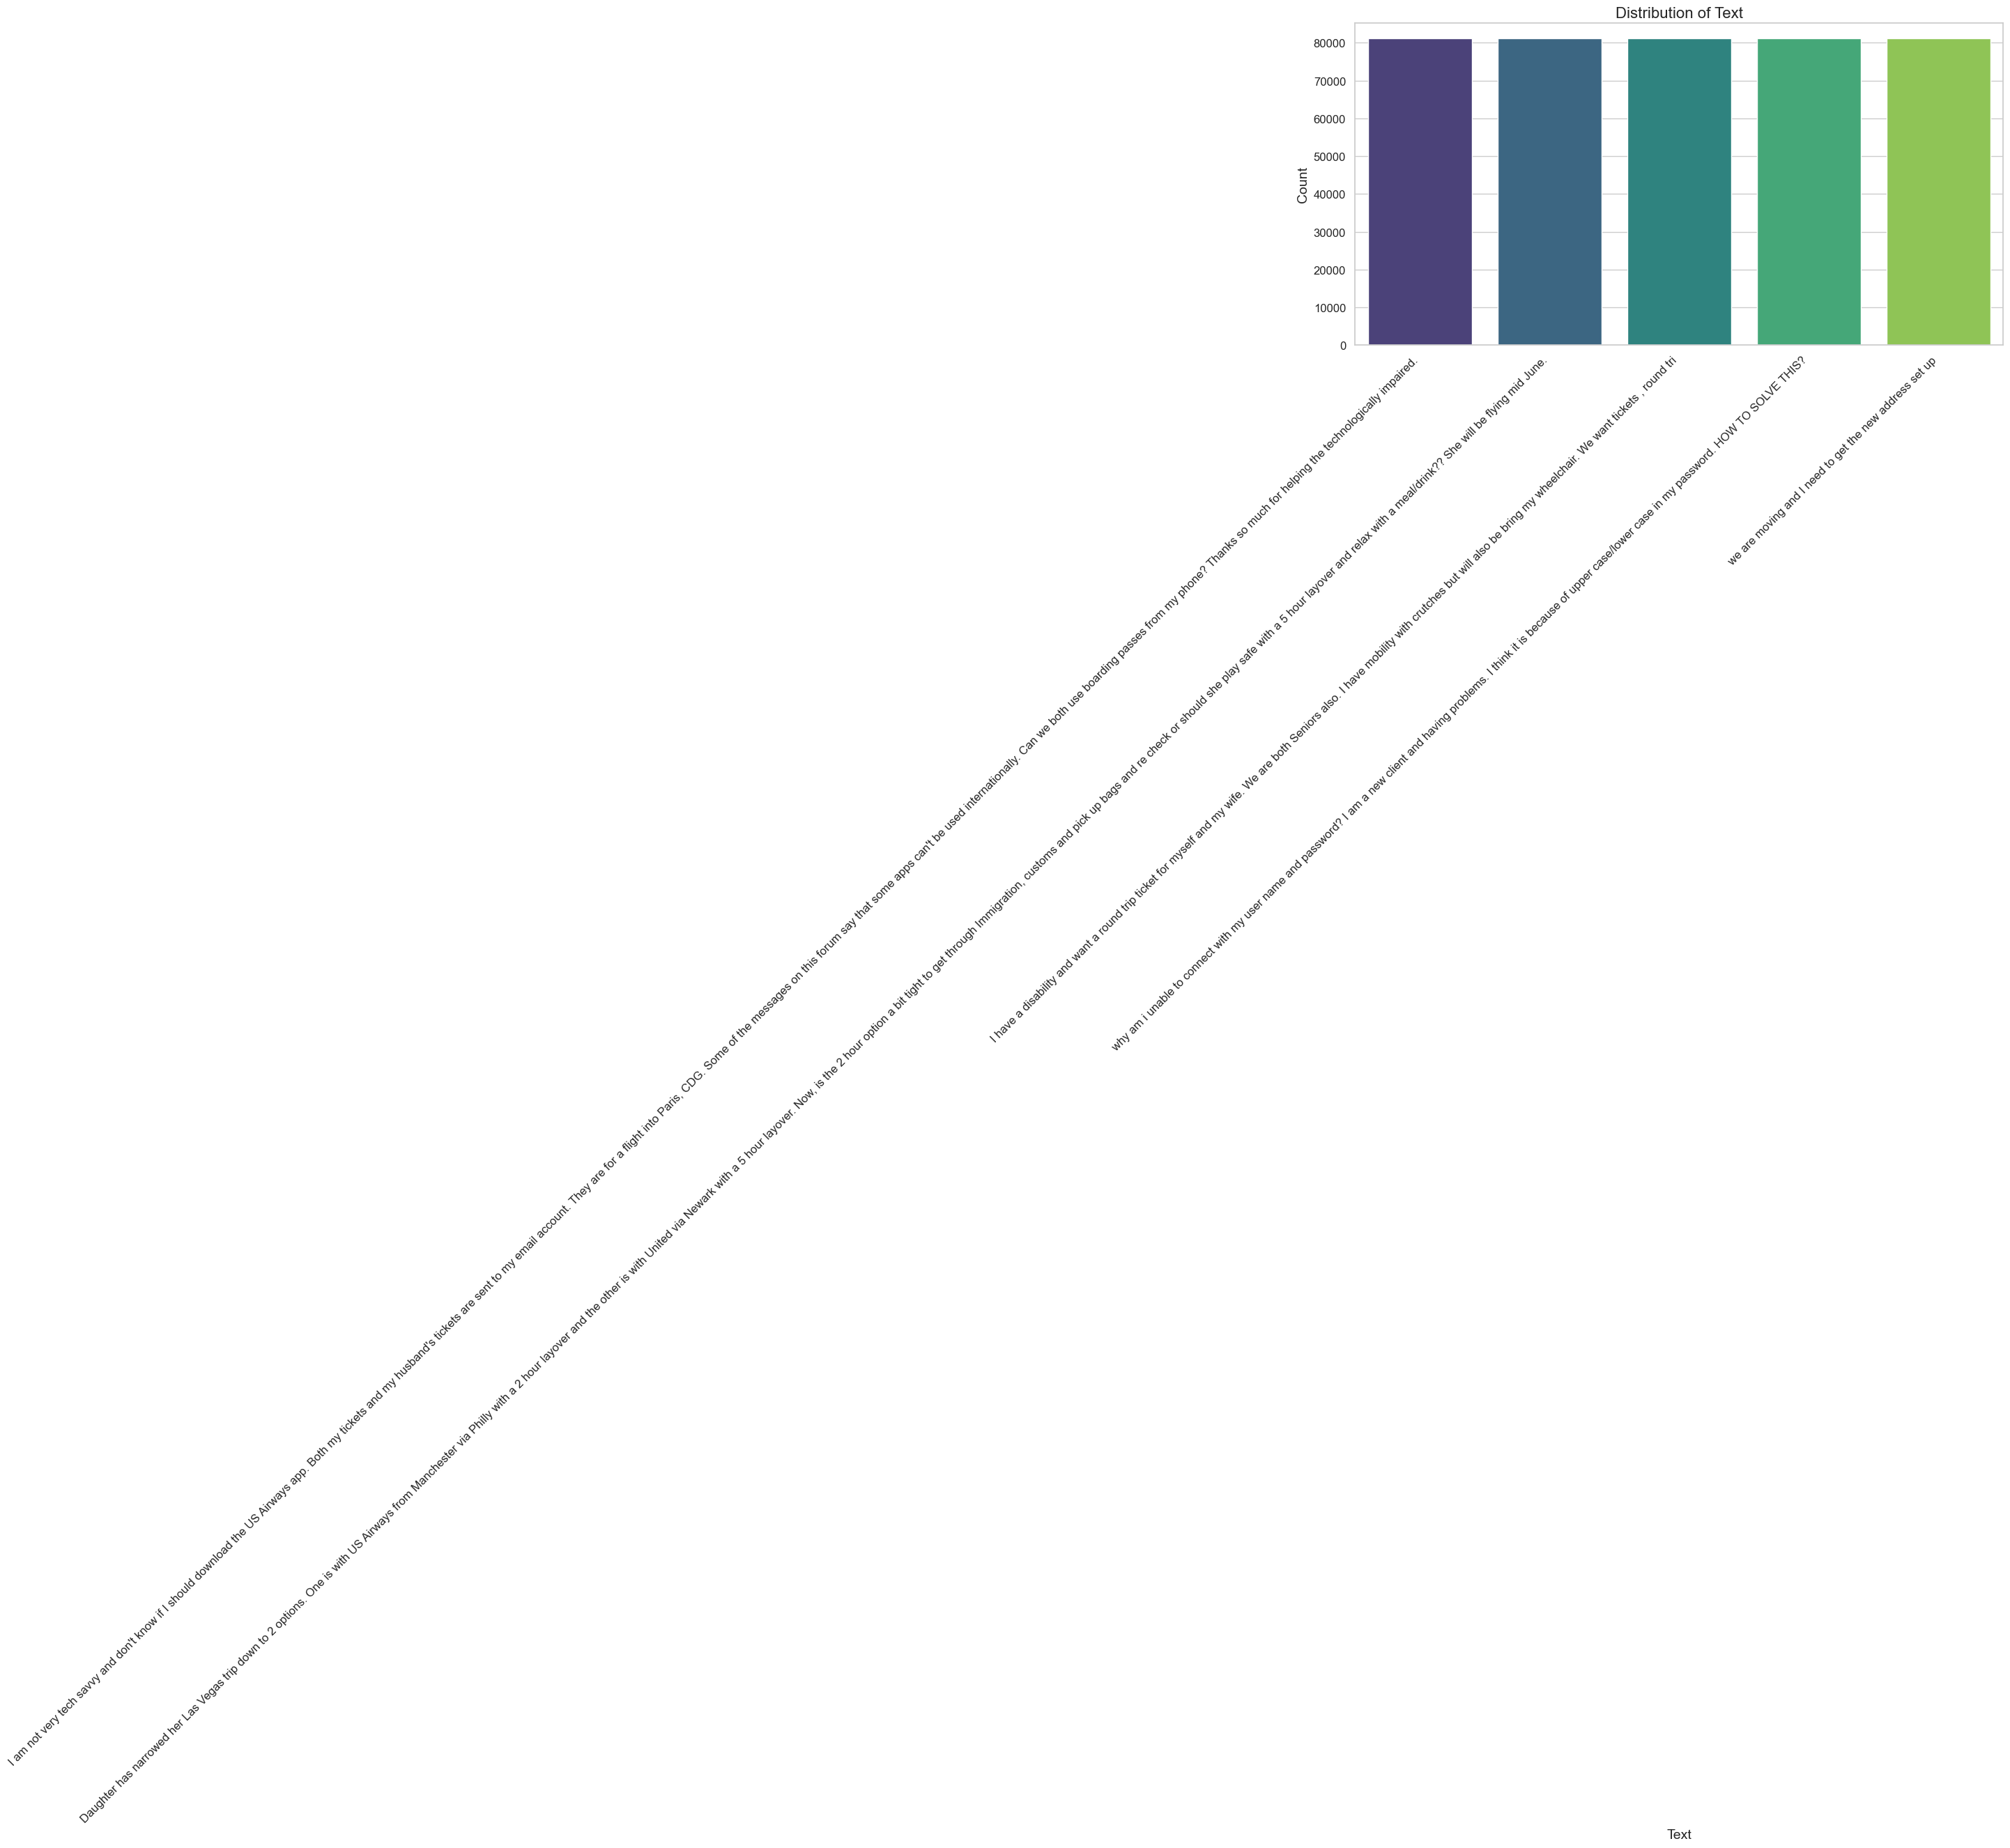

C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


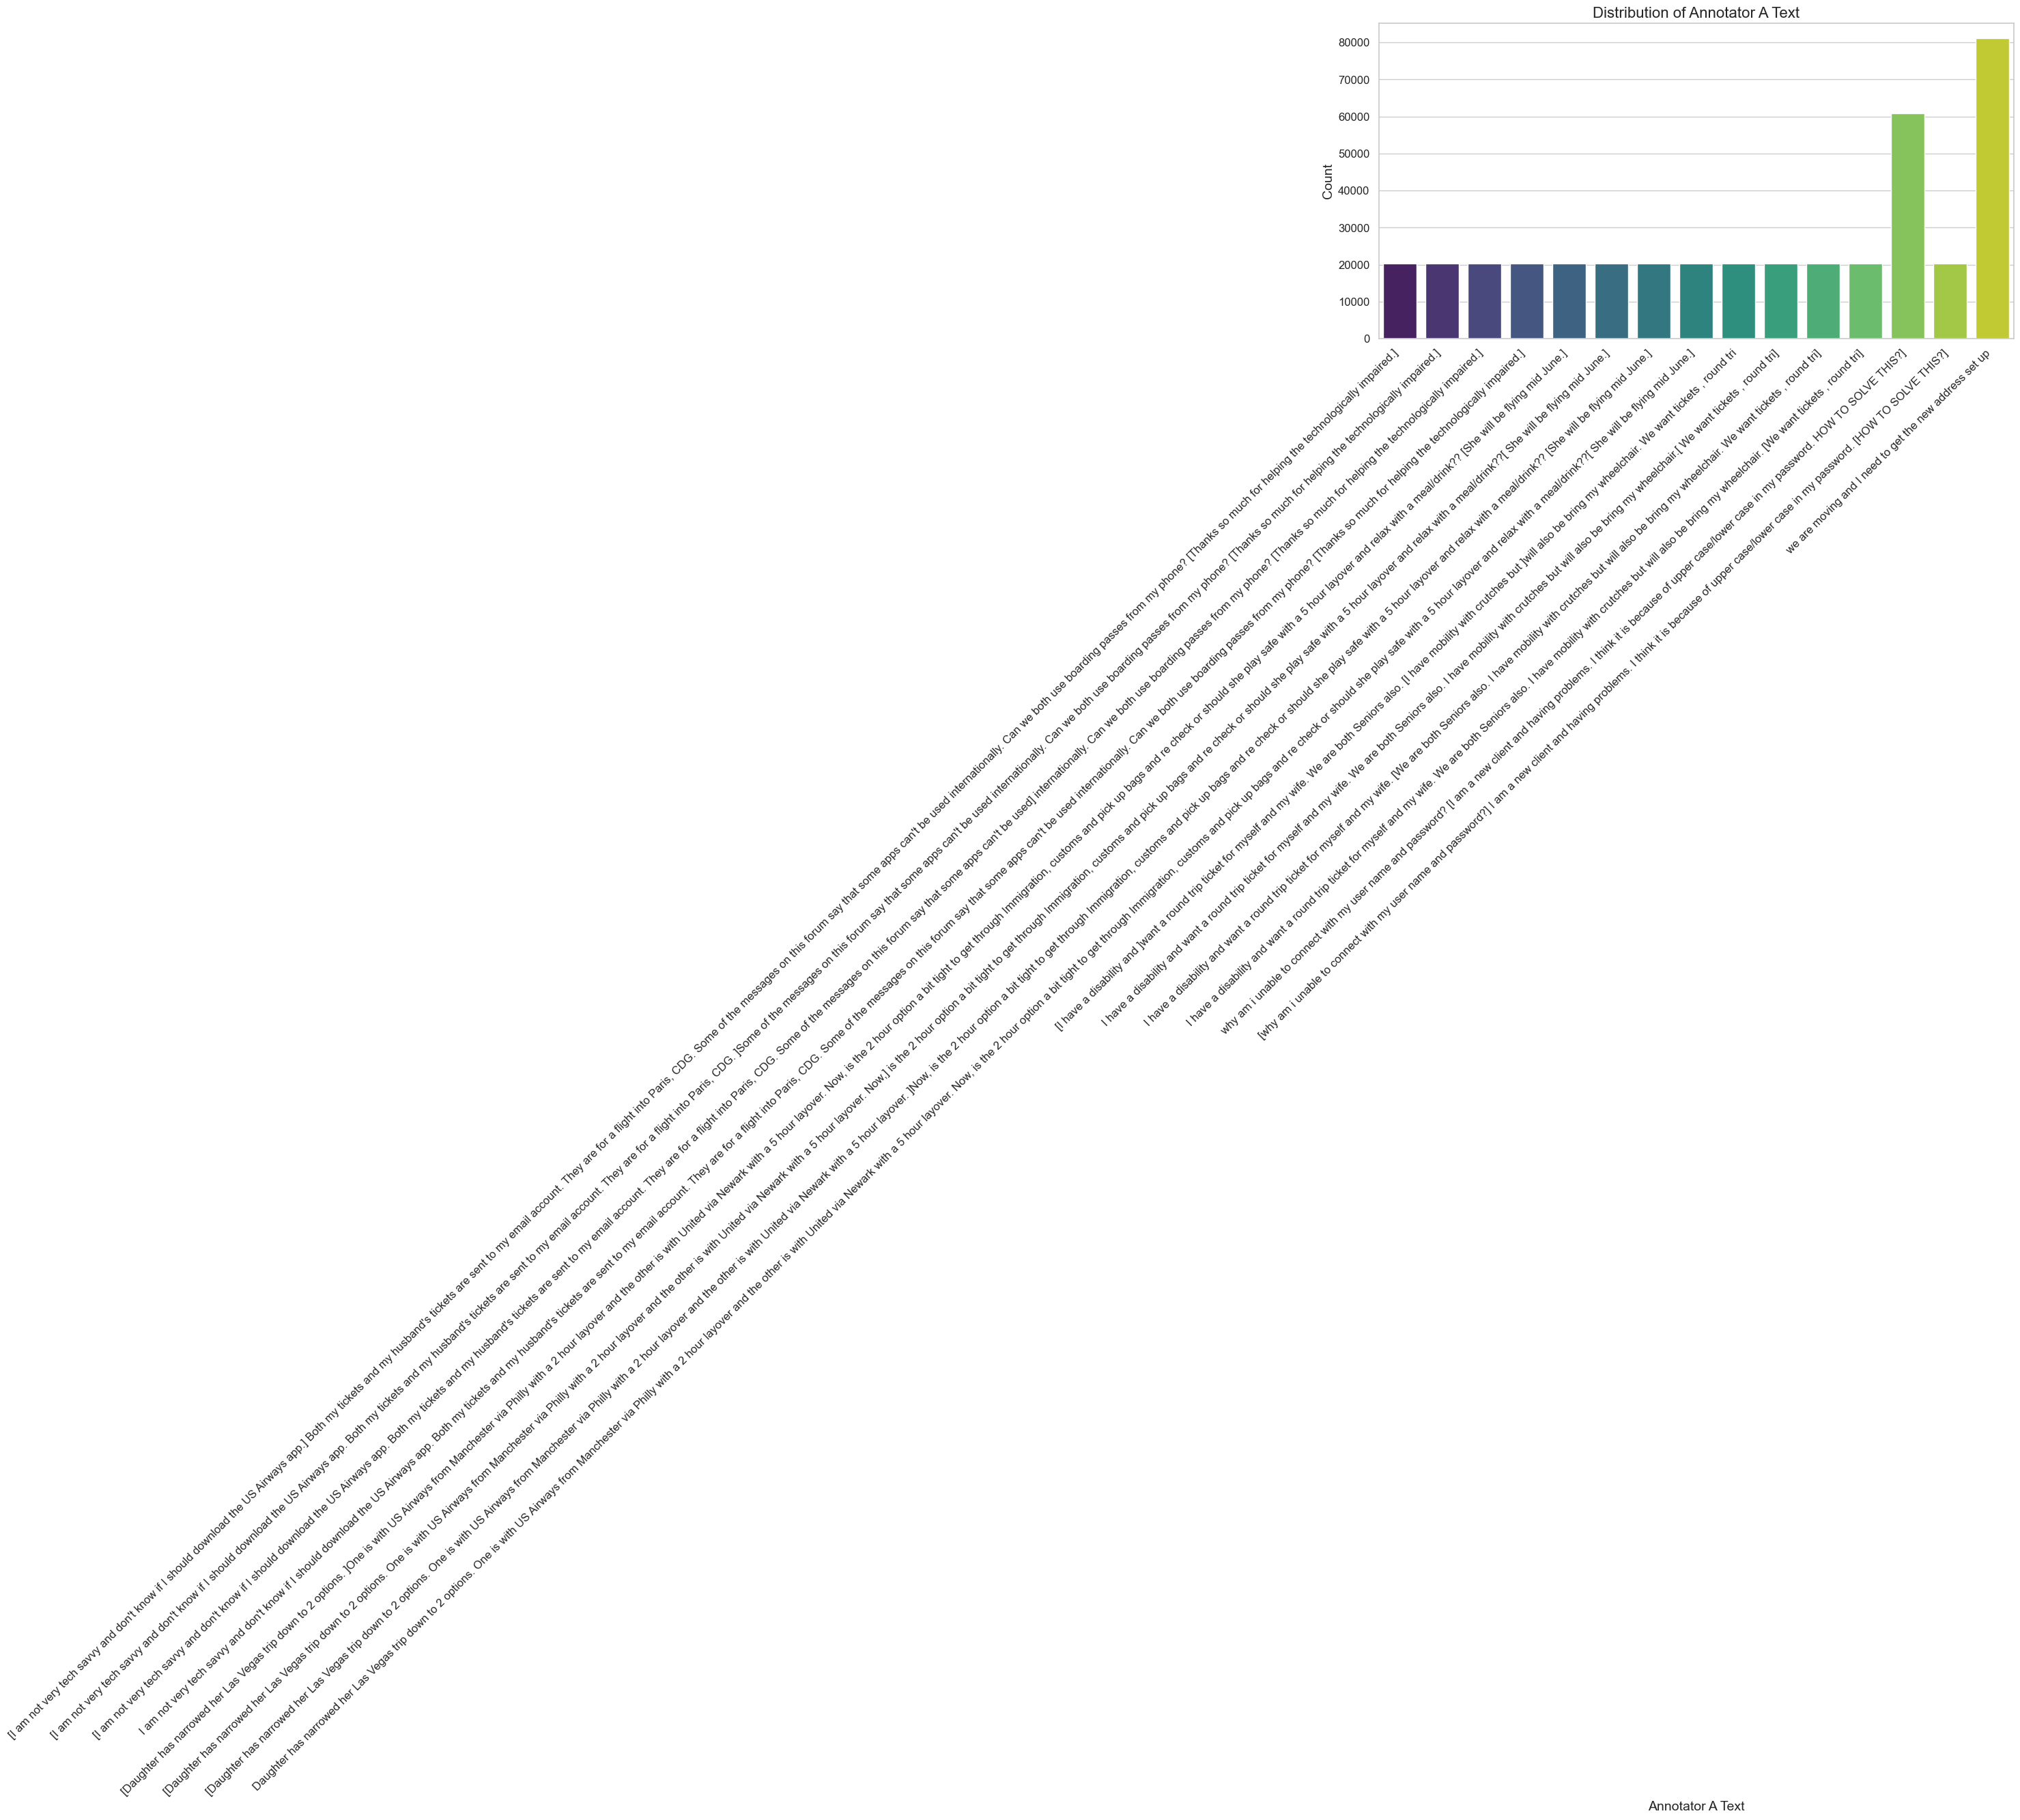

C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


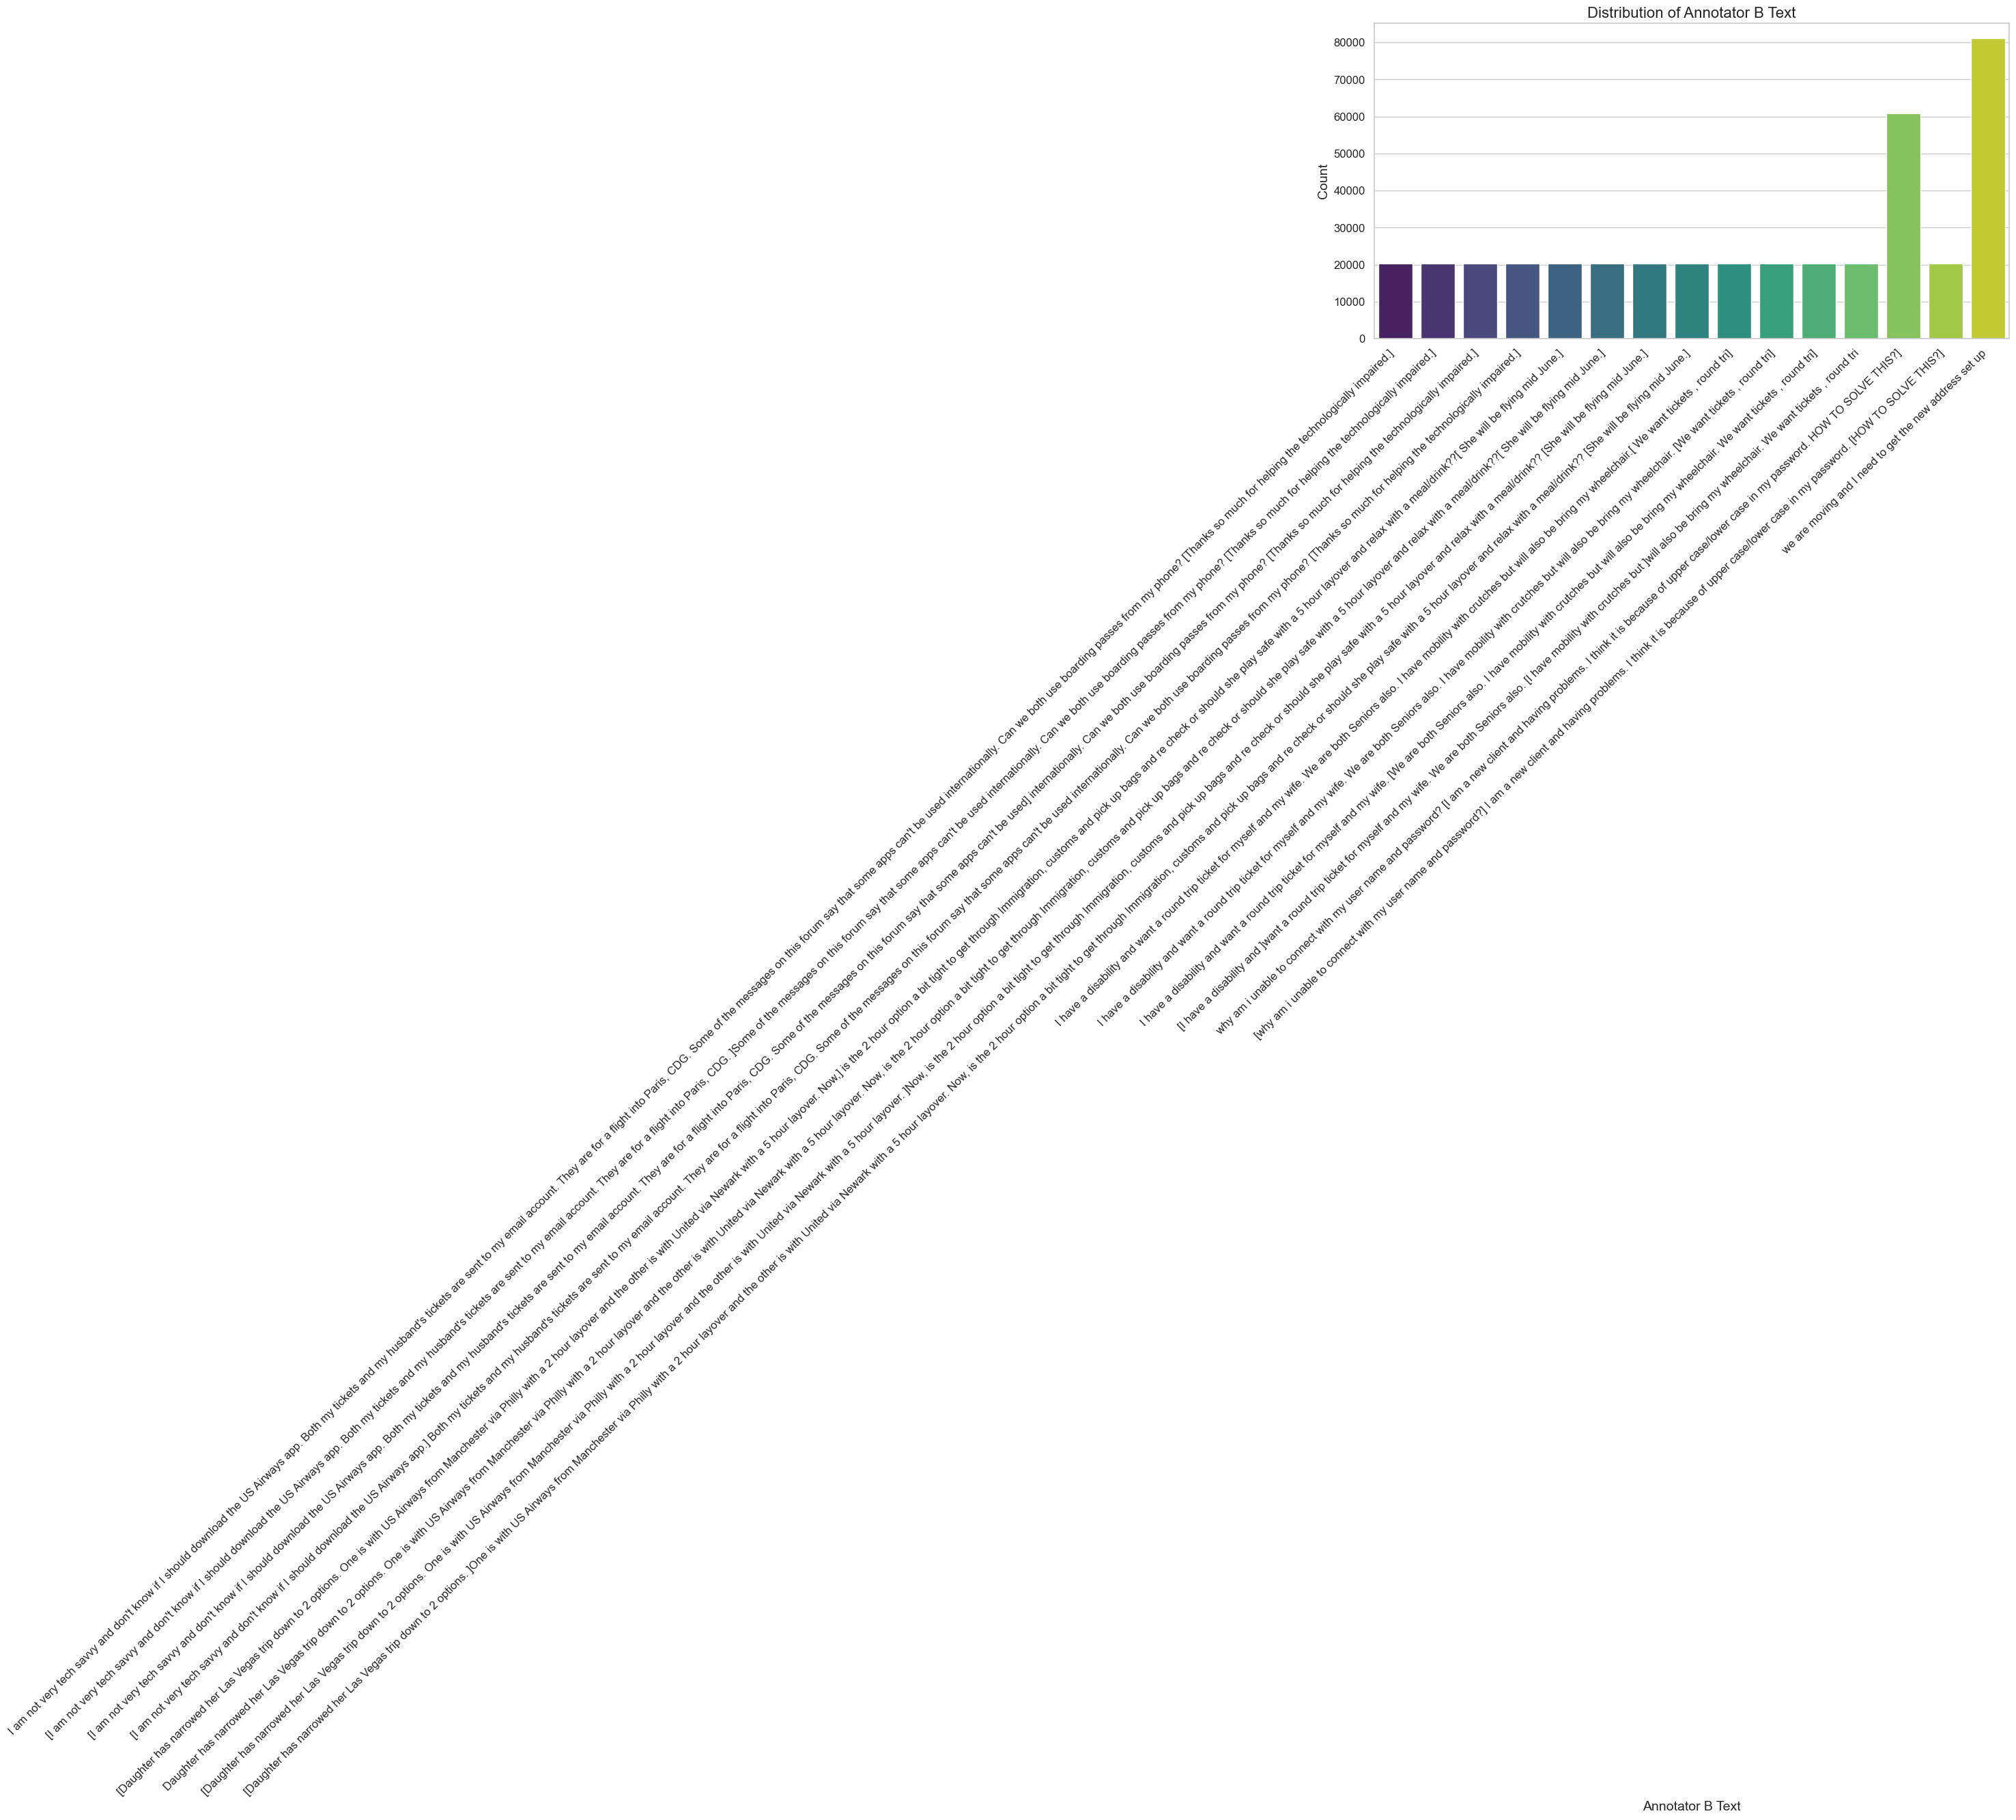

C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


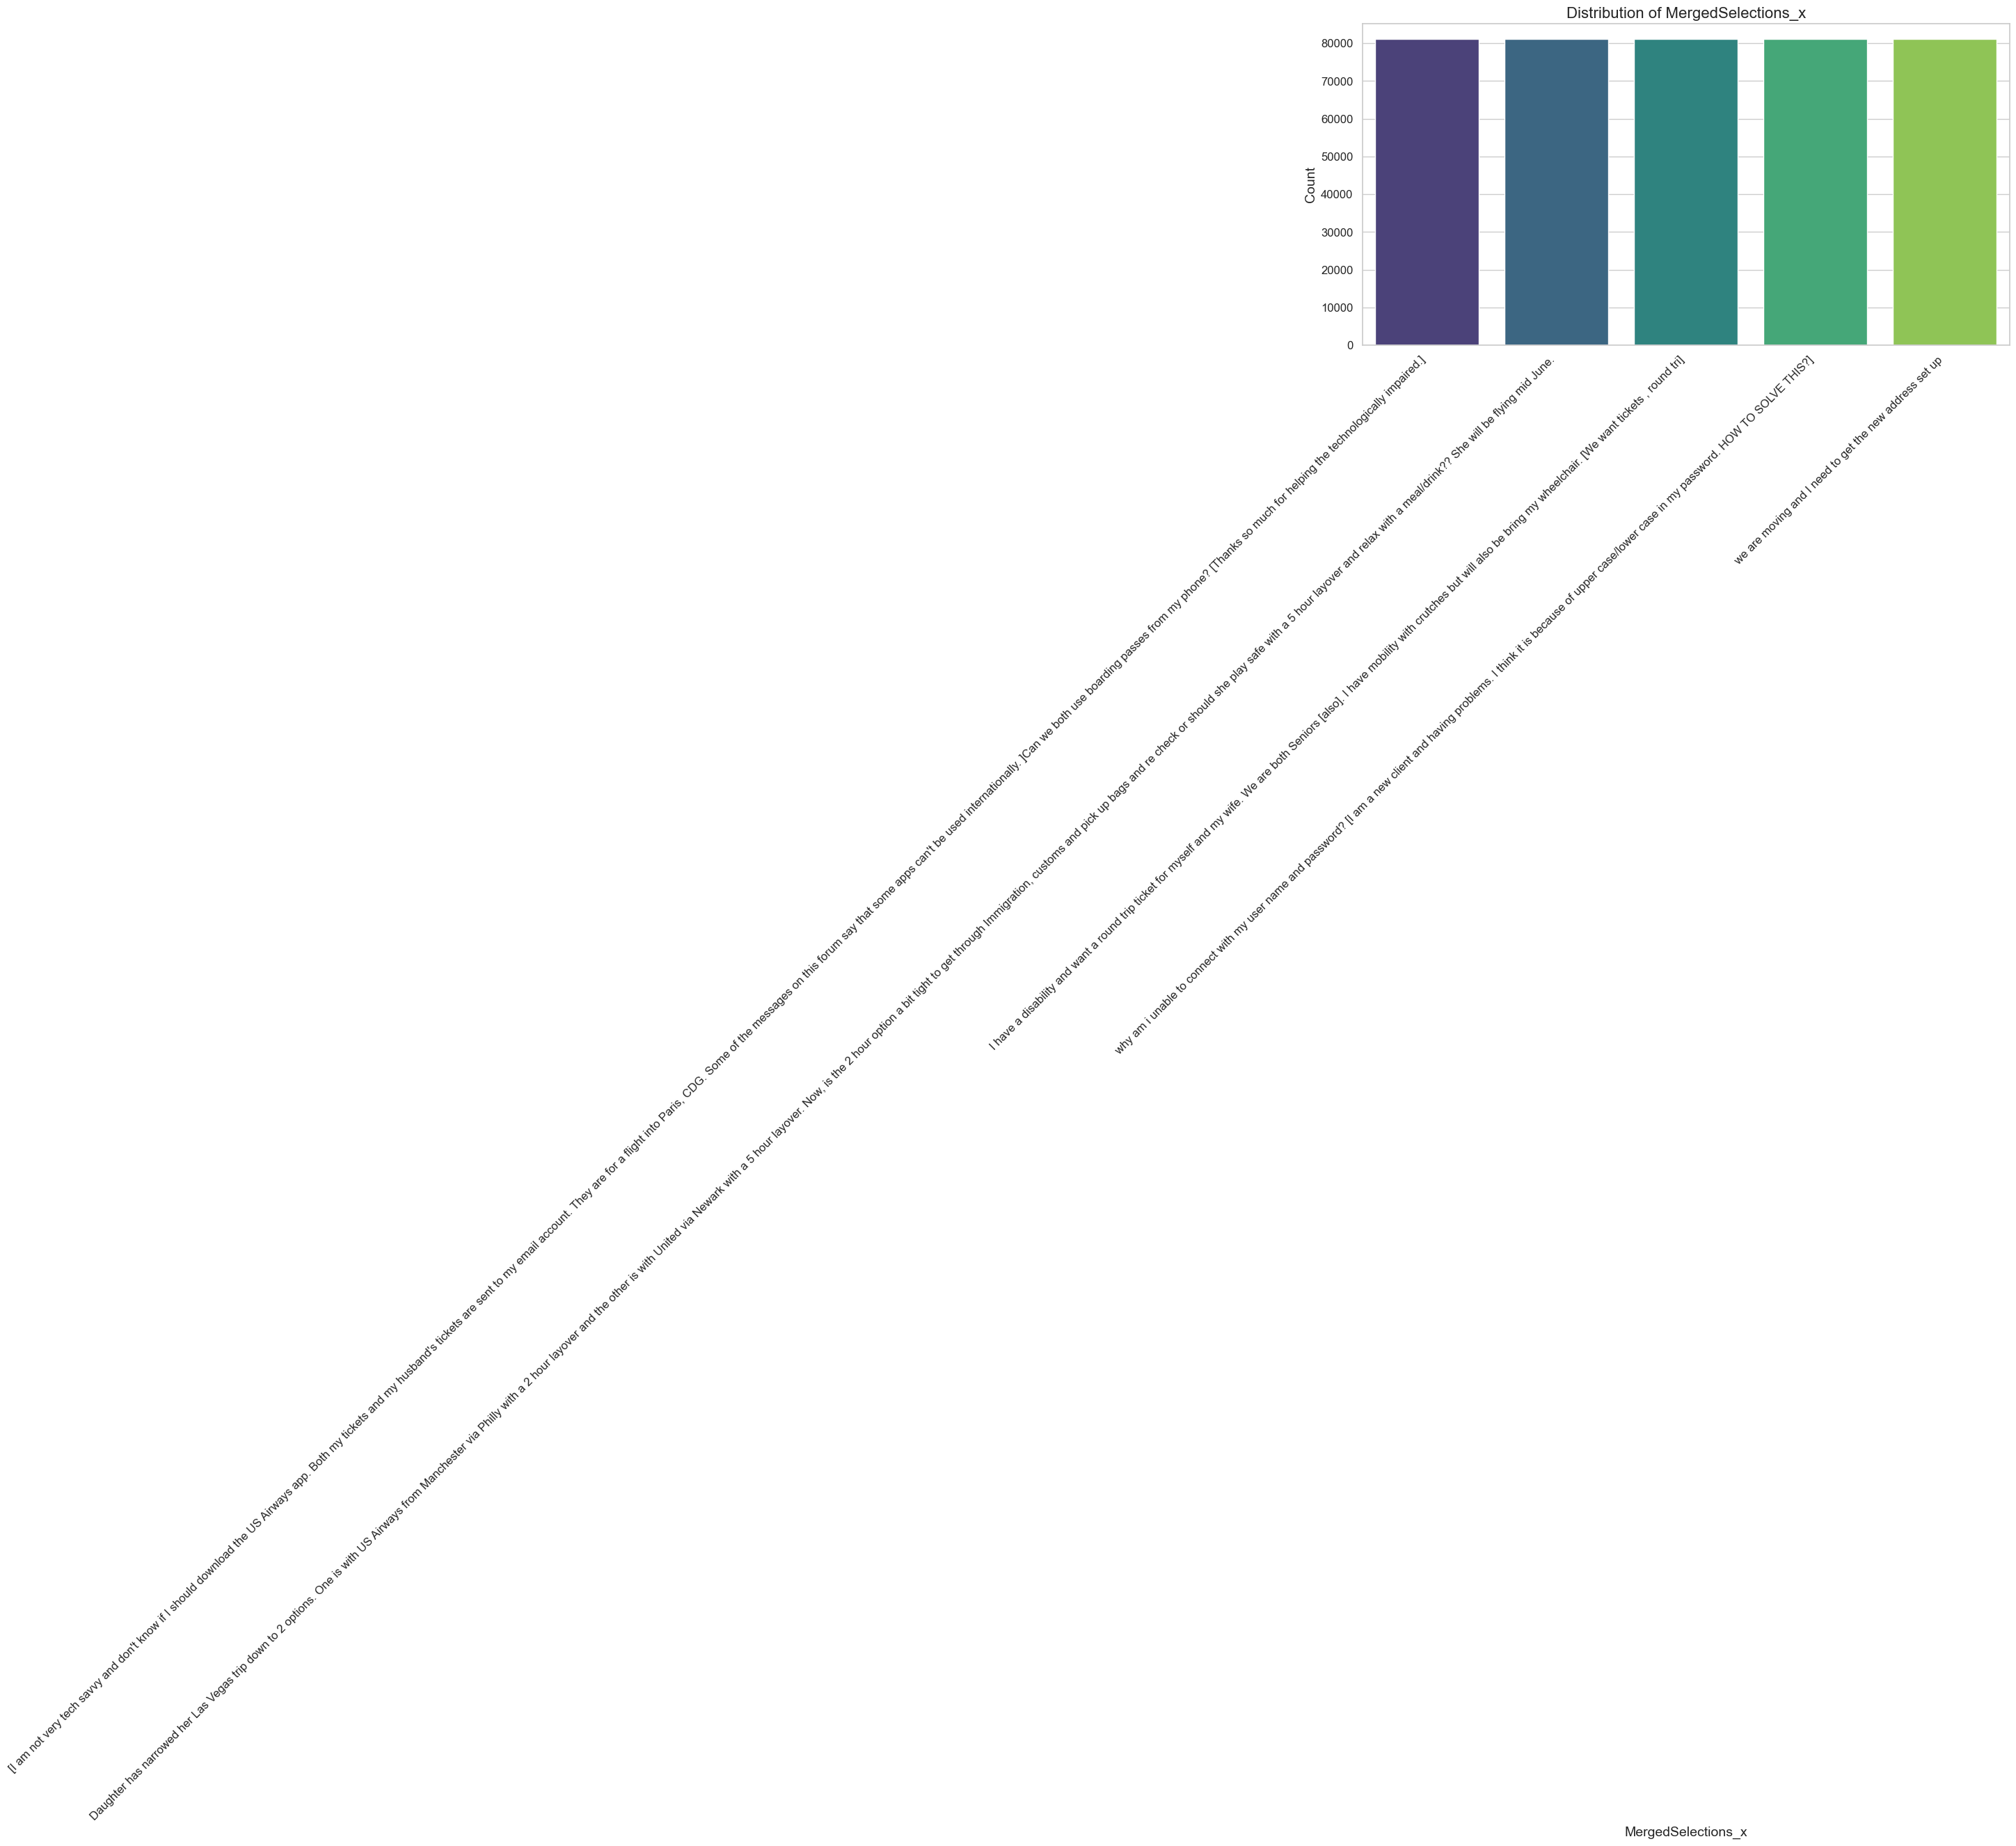

C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


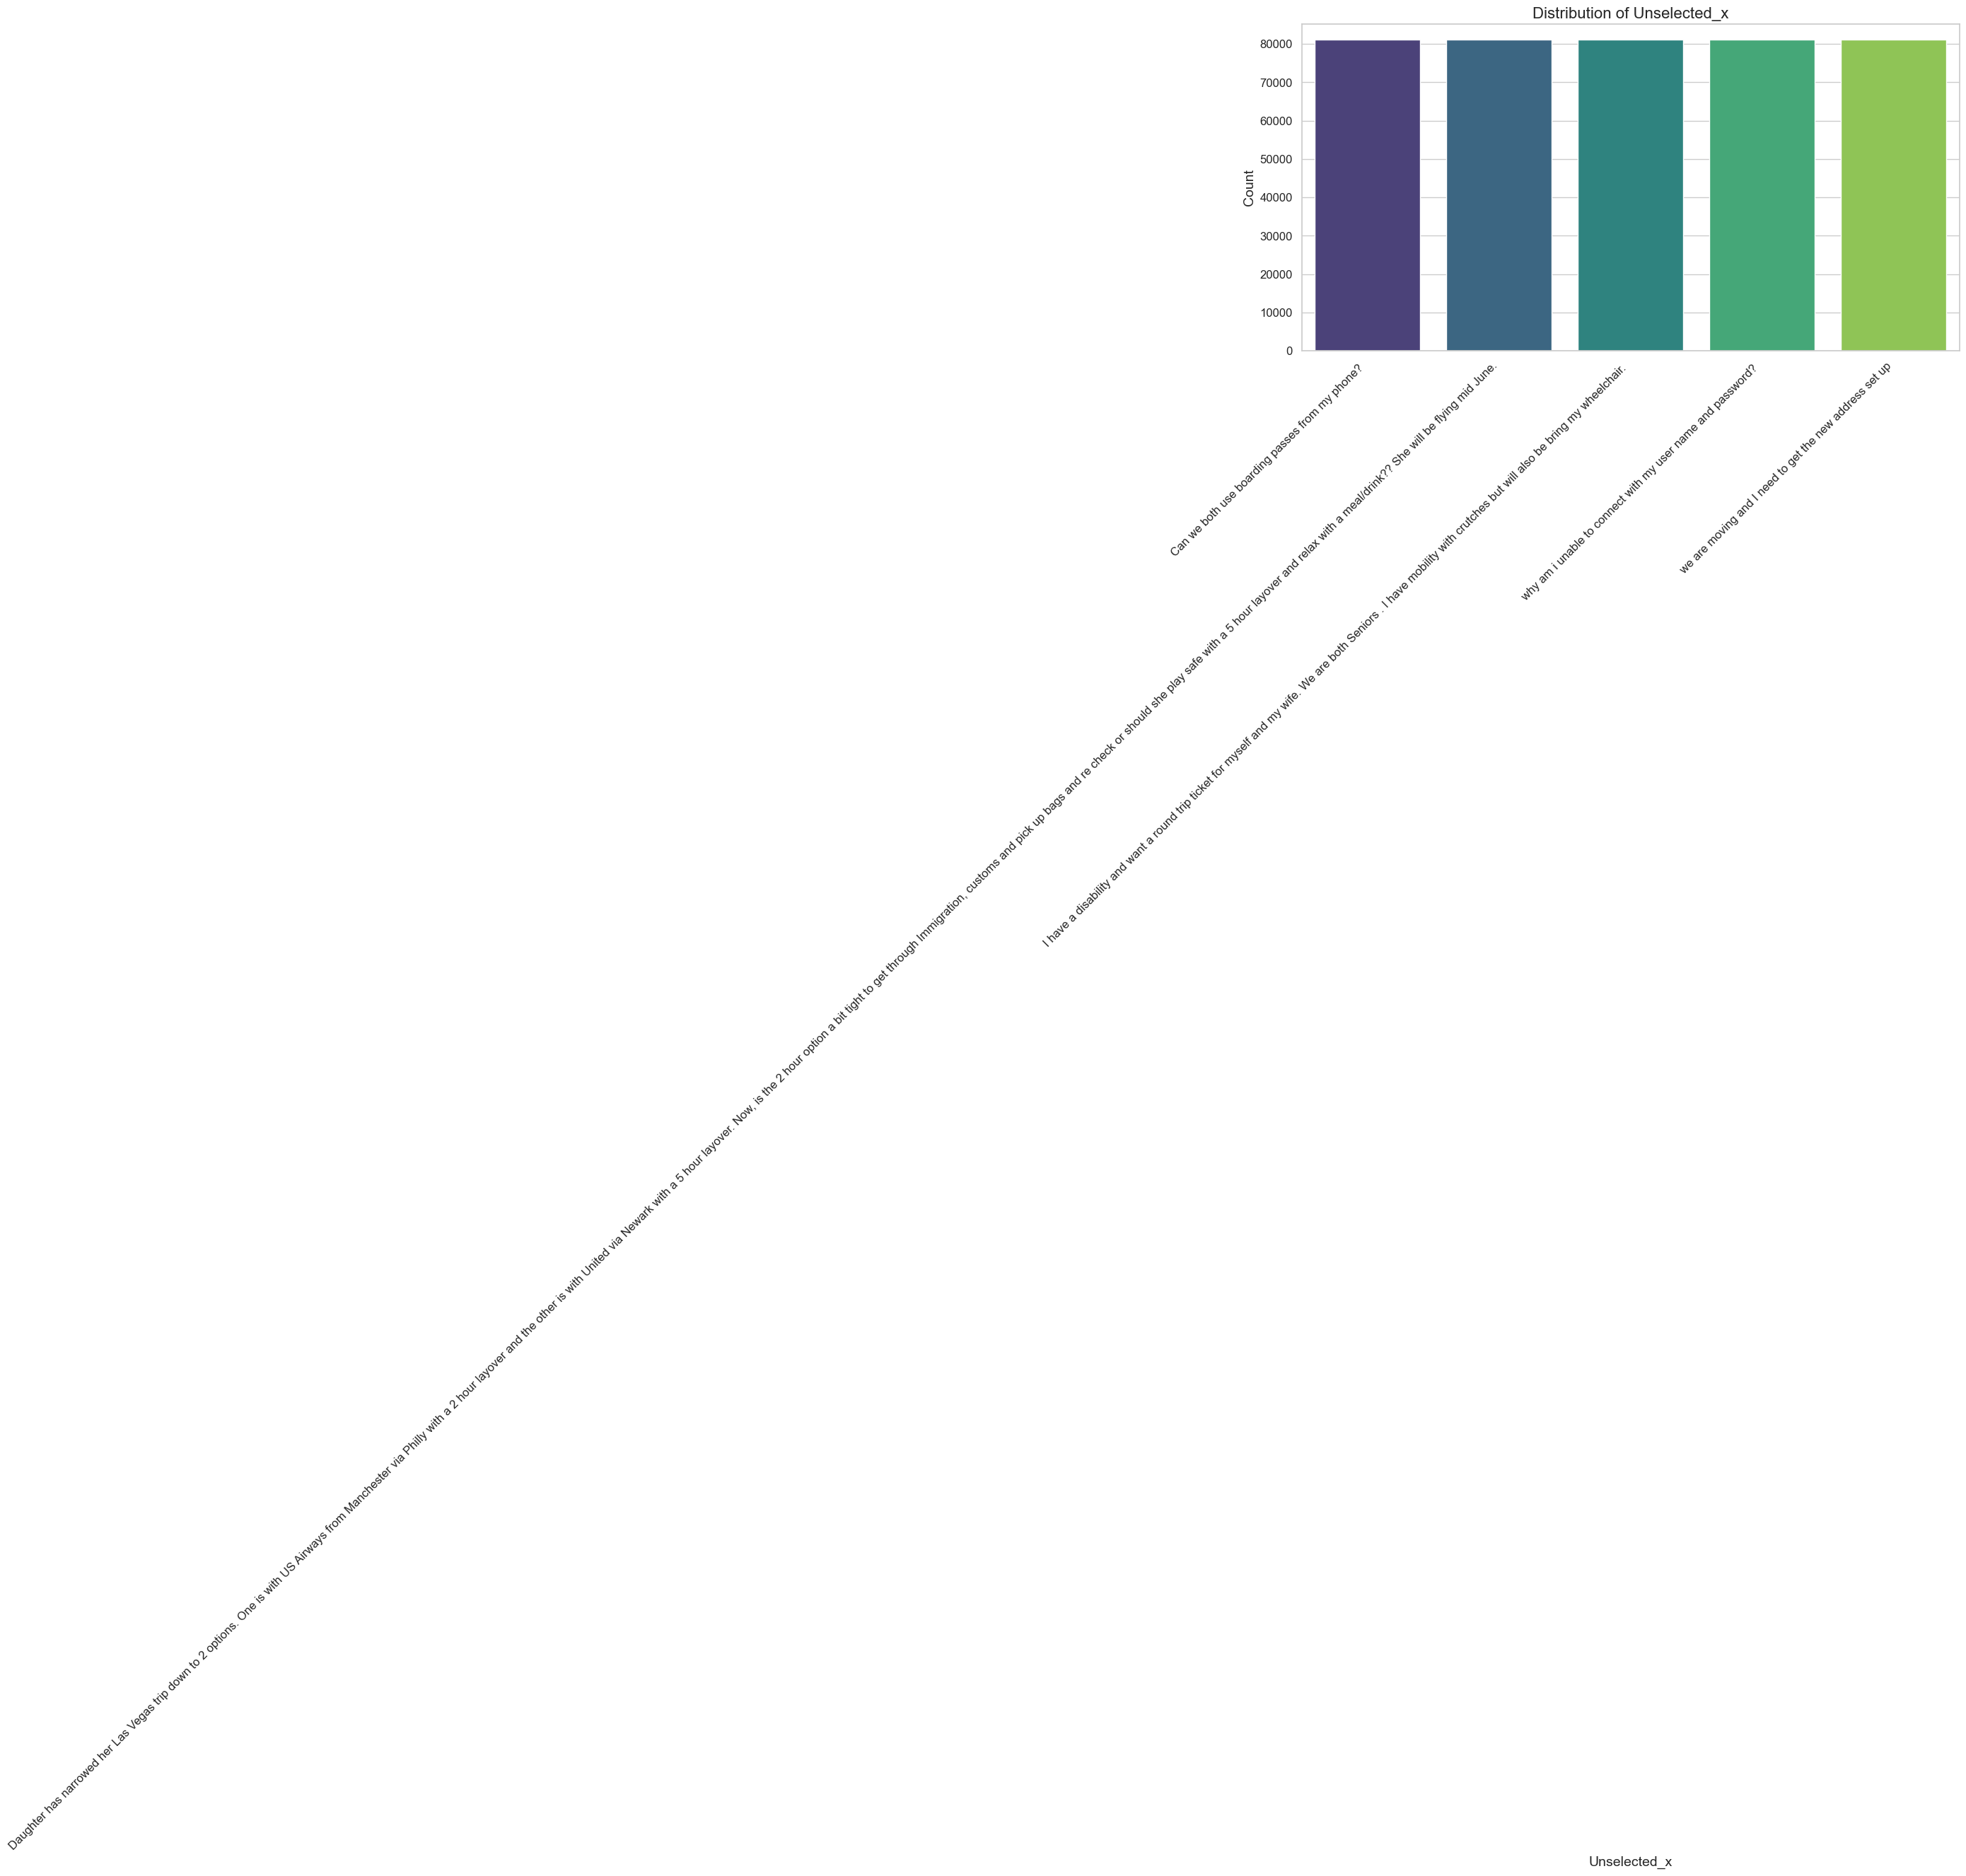

C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


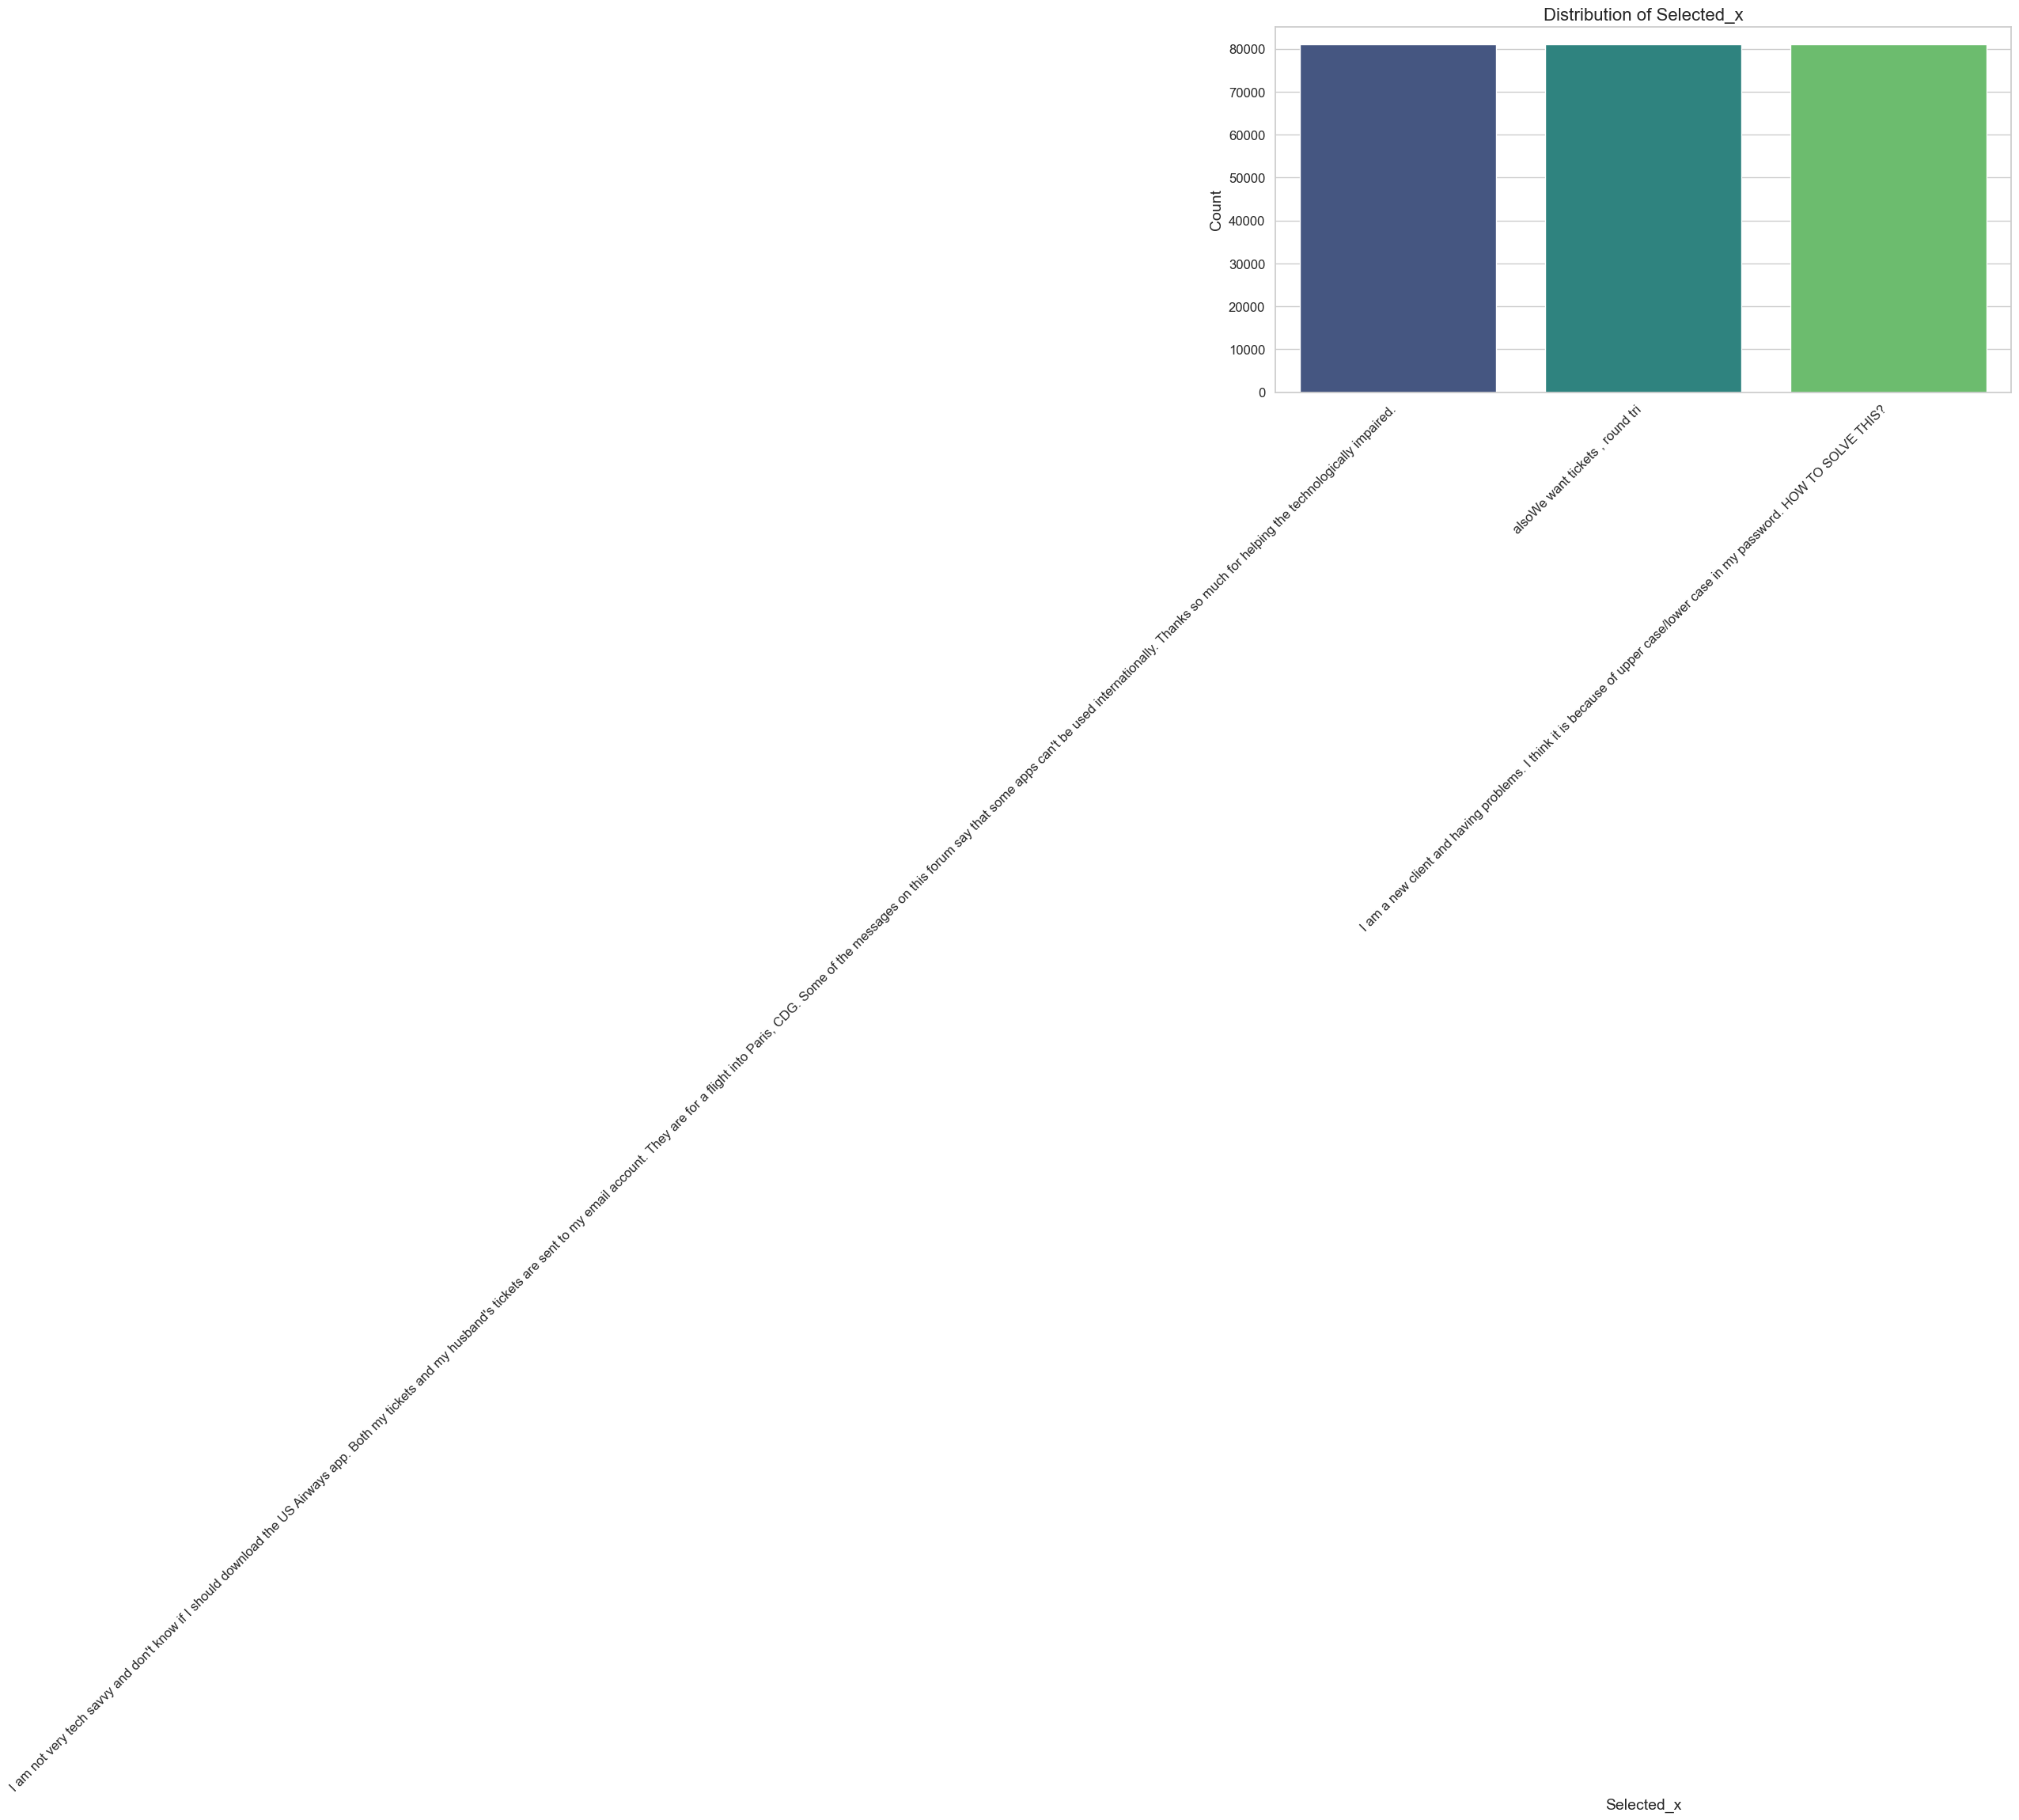

C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Glyph 128540 (\N{FACE WITH STUCK-OUT TONGUE AND WINKING EYE}) missing from current font.
  plt.tight_layout()
C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.tight_layout()
C:\Users\pc\AppData\Local\Temp\ipykernel_39076\1245195051.py:27: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  plt.tight_layout()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_categorical_columns(df):
    """
    Visualize the distribution of all categorical columns in the DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
    """
    # Set style
    sns.set(style="whitegrid")

    # Extract categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Loop through each categorical column
    for column in categorical_columns:
        # Create count plot
        plt.figure(figsize=(12, 6))
        sns.countplot(x=column, data=df, palette="viridis")
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.xticks(fontsize=12, rotation=45, ha='right')
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()

# Example usage:
visualize_categorical_columns(merged_by_threshold)



